<a href="https://colab.research.google.com/github/HoverflyHampton/Tetherkit_NN_Utilities/blob/master/AnglePredictionRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [26]:
uploaded = files.upload()

Saving RawCulledDataAnglesVarry.xlsx to RawCulledDataAnglesVarry.xlsx


In [44]:
def load_and_train_model(file_path):
    # Load the data
    data = pd.read_excel(file_path)

    # Splitting the data into features and targets
    X = data[['Roll', 'Pitch', 'Altitude', 'Tether Roll', 'Tether Pitch']].copy()
    y = data[['RTKRoll', 'RTKPitch']].copy()

    X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33, random_state=42)

    # Initialize and train the Random Forest Regressor on the entire dataset
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train, y_train)

    # Predicting on the entire dataset
    y_pred = rf_regressor.predict(X_test)



    # Calculating the time for each point in the dataset (0.2 seconds per row)
    time = np.arange(0, len(X_test) * 0.2, 0.2)

    # Plotting the results
    plt.figure(figsize=(12, 20))

    # Plot for RTKRoll over time
    plt.subplot(4, 1, 1)
    plt.plot(time, y_test['RTKRoll'], label='Actual Roll')
    plt.plot(time, y_pred[:, 0], label='Predicted Roll', linestyle='dashed')
    # plt.plot(time, X_test['Tether Pitch'], label='ATS Roll')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Roll')
    plt.title('Machine Learning Comparison Roll')
    plt.legend()

    # plot delta of roll
    plt.subplot(4, 1, 2)
    plt.plot(time, y_pred[:, 0] - y_test['RTKRoll'], label="Roll Delta")
    plt.xlabel('Time (seconds)')
    plt.ylabel('Roll Delta (Predicted-True)')
    plt.title('Machine Learning Comparison Roll')
    plt.legend()

    # Plot for RTKPitch over time
    plt.subplot(4, 1, 3)
    plt.plot(time, y_test['RTKPitch'], label='Actual Pitch')
    plt.plot(time, y_pred[:, 1], label='Predicted Pitch', linestyle='dashed')
    # plt.plot(time, X_test['Tether Roll'], label='ATS Pitch')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Pitch')
    plt.title('Machine Learning Comparison Pitch')
    plt.legend()

    # plot delta of roll
    plt.subplot(4, 1, 4)
    plt.plot(time, y_pred[:, 1] - y_test['RTKPitch'], label="Pitch Delta")
    plt.xlabel('Time (seconds)')
    plt.ylabel('Pitch Delta (Predicted-True)')
    plt.title('Machine Learning Comparison Pitch')
    plt.legend()

    plt.tight_layout()
    print("Preparing to display plot...")

    plt.show()

Preparing to display plot...


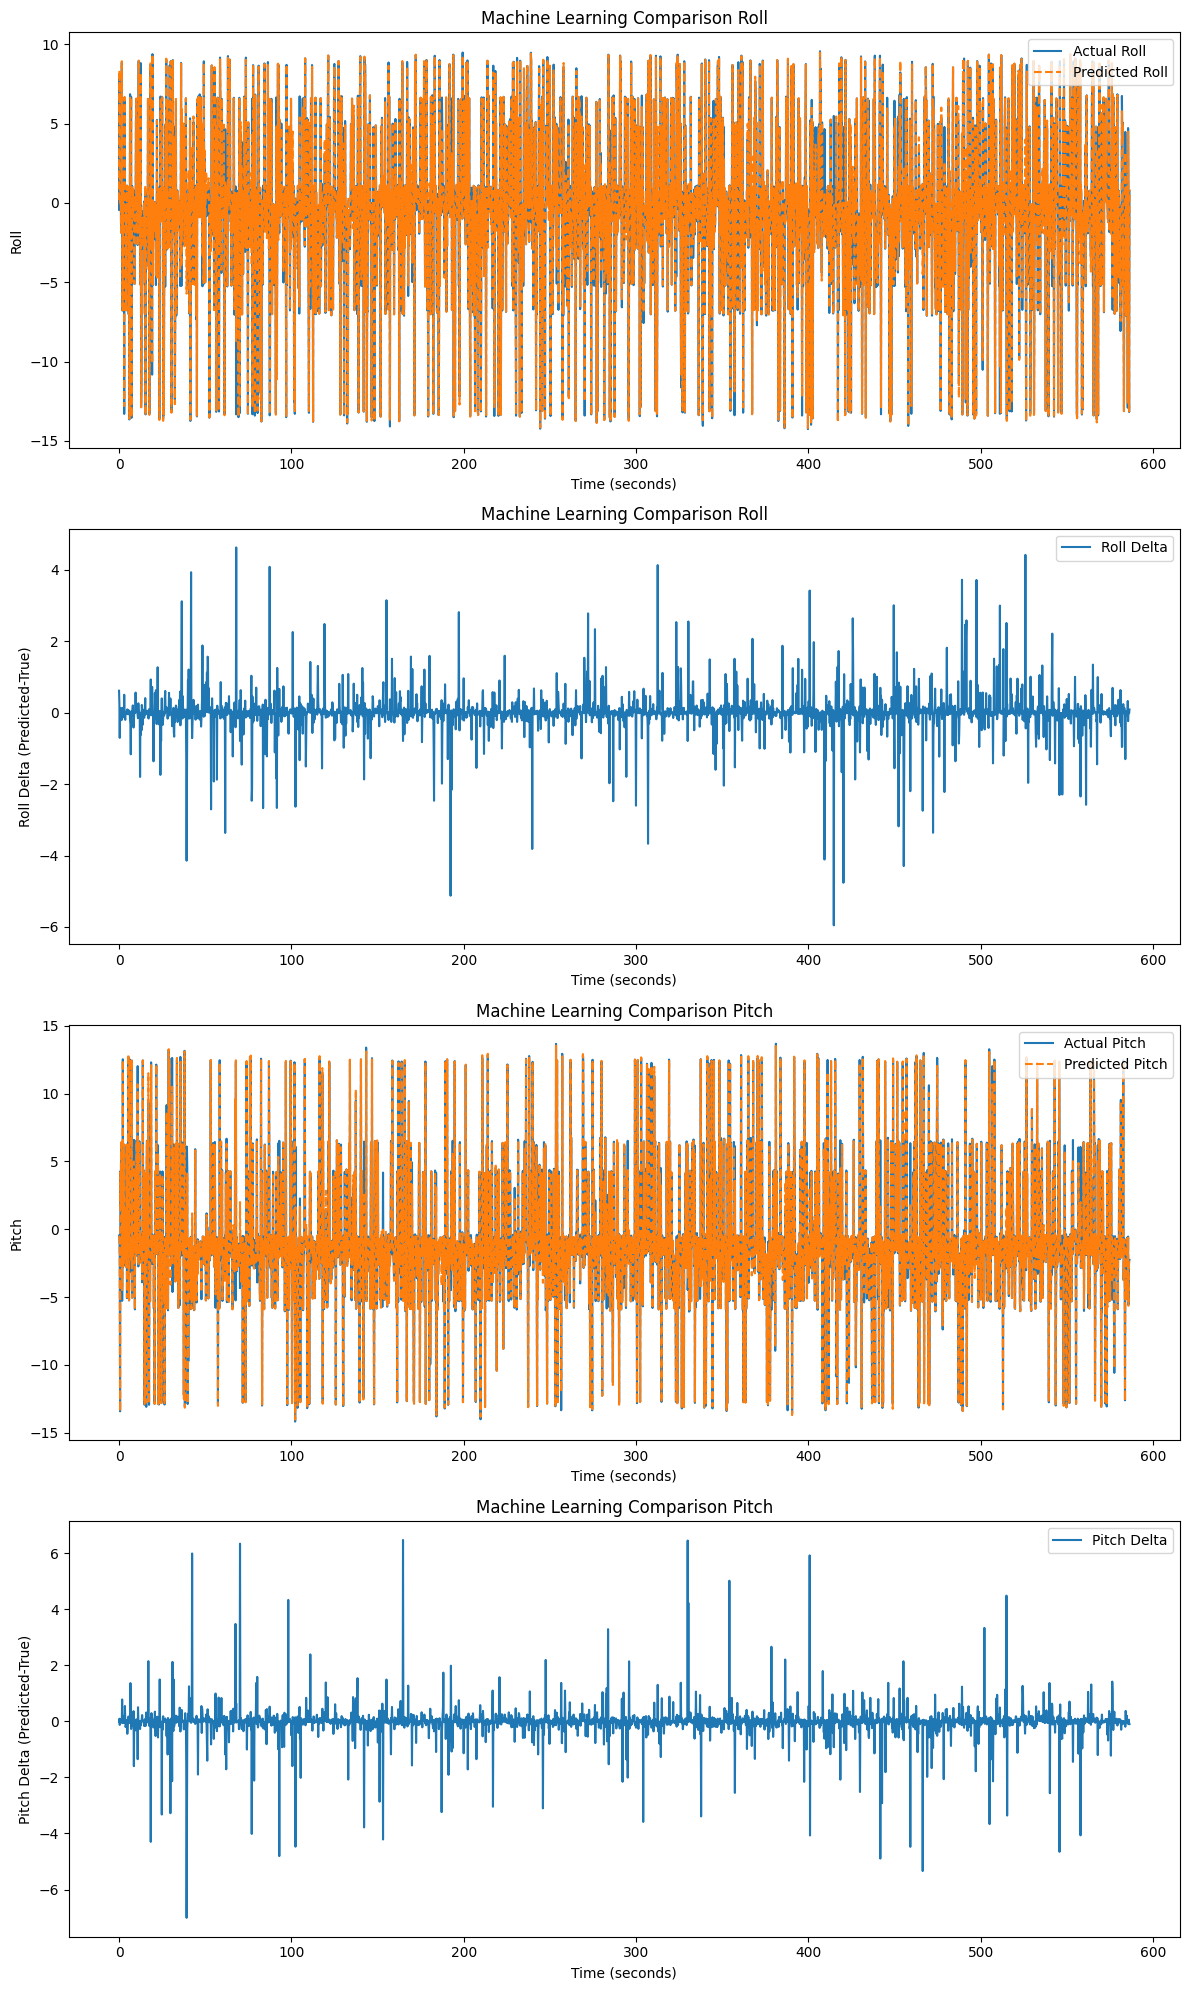

In [45]:
load_and_train_model(list(uploaded.keys())[0])